# 데이터 분석 프로세스

- 초기화 및 파이썬 모듈 로딩
    - sklearn => 머신러닝
    - scipy => 수치 계산
    - pandas => 데이터 로딩, 수치 계산
    - numpy => 수치 계산
    - matplotlib => 시각화
- 데이터 수집
- 데이터 탐색 및 준비
    - 결측치, 이상치에 대한 처리
    - 추가 변수에 대한 처리
    - 훈련데이터와 테스트데이터로 분리
- 모델 훈련
    - 정형데이터분석(sklearn 기준, fit -> predict -> score)
        - 지도학습 ⇒ 타겟 변수가 존재
            - 분류
                - 의사결정나무 
                  - 분류, 회귀 둘다 사용 가능
                  - 이해쉽지만, 과대적합 가능성 크고, 경계면의 데이터 분류가 잘못될 수 있음
                - 앙상블(배깅,부스팅,랜덤포레스트)
                  - 랜덤포레스트 
                    - 성능 우수(결정트리 여러개 사용), 차원높고 희소한 데이터에는 잘 동작 안함
                  - 부스팅
                    - 랜포와 유사하게 성능 우수하나, 훈련 시간이 오래 걸림, 매개변수 튜닝이 중요
                  - 배깅
                - SVM(초평면, 커널함수)
                - k-NN
                - ANN
                - 로지스틱회귀
                - 나이브베이즈
            - 예측
                - 선형회귀
                    - 단순선형회귀
                    - 다중선형회귀
                    - 릿지 회귀
                    - 라쏘 회귀
                    - 엘라스틱넷 회귀
                - 비선형회귀
                    - 다항회귀(polynomial regression)
        - 비지도학습 ⇒ 타겟 변수 미존재
            - 군집
                - 계층적군집
                - 비계층적군집
                - 혼합분포군집
            - 연관분석(장바구니분석)
    - 비정형데이터분석
        - 텍스트마이닝
- 모델 성능 평가
    - 분류
        - 정오분류표(혼동행렬) ⇒ accuracy가 1에 가까울수록 좋은 모델
        - ROC/AUC ⇒ AUC가 1에 가까울수록 좋은 모델
    - 예측 ⇒ MAE, RMSE
- 모델 성능 개선

x shape=(100, 2), len=100, y shape=(100,), len=100
[[ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]
 [ -9.76761777  -3.19133737]
 [ -4.53655648  -8.40186288]
 [ -6.26302115  -8.10666081]
 [ -6.38481234  -8.4730297 ]
 [ -9.20490564  -4.57687928]
 [ -2.76017908   5.55121358]
 [ -1.17104176   4.33091816]]
[1 1 1 2 2 2 1 0 0]


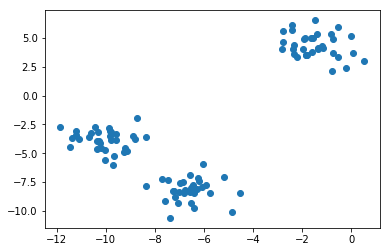

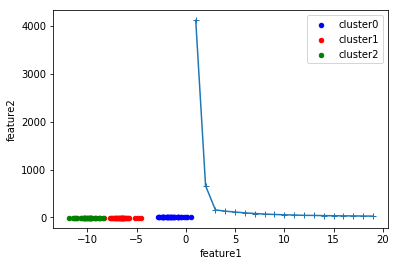

In [61]:
# 비계층적 군집분석(k-means)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.cluster import KMeans

# 데이터 수집
raw_data = datasets.make_blobs(random_state = 1)
x, y = raw_data

# 데이터 탐색 및 준비
# 데이터를 보면, x 에는 2차원값이 들어가 있고, y는 그 분류 라벨이 있는 것임
print(f"x shape={x.shape}, len={len(x)}, y shape={y.shape}, len={len(y)}")

print(x[1:10, ])
print(y[1:10])

# 값을 2차원 좌표평면위에 표시하면 거의 일직선 상에 있는걸 볼 수 있음
plt.scatter(x = x[:, 0], y = x[:, 1])

# 모델 훈련
# 클러스터 개수는 3개가되도록 적용
model = KMeans(n_clusters = 3)
model.fit(x)

# 모델 성능 평가
# 비지도학습 특성상, 시각화 및 엘보우법, 실루엣 계수를 이용하여 평가
# 예측한 결과값 저장
y_pred = model.predict(x)

# 시각화
merged_data = pd.concat([pd.DataFrame(x[:, 0]), pd.DataFrame(x[:, 1]), pd.DataFrame(y_pred)], axis=1)

merged_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
colors = ['blue','red','green']
for i, data in merged_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2',color=colors[i], label=f'cluster{i}', ax=ax)
    
# 엘보우법으로 군집수 정하기
# 엘보우법 => 각 군집의 중심과 군집에 속하는 각 점간의 거리 총합을 이용
# 당연히 군집수가 늘어날수록, 거리 총합은 줄어들게 됨
dist_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(x)
    dist_list.append(kmeans.inertia_)

# 군집수가 3개 초과시 변화가 미미하므로, 3개의 군집수가 적합
plt.plot(range(1,20), dist_list, marker = '+')

# 모델 성능 개선

